# **Multi Layer Perceptron models for gender and ethnicity on UTK dataset from Kaggle**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Mounted at /content/gdrive
gdrive	sample_data


In [2]:
%cd gdrive/MyDrive/'Colab Notebooks'/ML/ML
!ls

/content/gdrive/.shortcut-targets-by-id/15obIbkfLI-8Hkv38icjpTBpZQwVLgpOQ/ML
 all_saved_models	        MLP_ageneth.ipynb
'Augmentation .ipynb'	        mlp_ethnicity.jpg
 Aug_Novel_40.ipynb	        mlp_gender.jpg
 CNN.ipynb		        ML_projct_report
 CNN_loaded_saved_model.ipynb   Novelty_40_nonaug.ipynb
 dataset		        preprocessing.ipynb
 data_visualization.ipynb       preprocessing.py
'Horiz Flip of Augmentation '   __pycache__
 images_architecture	        svm
 imgs_new


Importing all the libraries

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
sns.set()

#for model etc-
import plotly.express as px
import numpy as np
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, accuracy_score, f1_score, precision_recall_fscore_support
from tensorflow.keras.models import load_model

import pandas as pd
import tensorflow as tf
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils.vis_utils import plot_model

Importing the preprocessing.py file to preprocess the data

In [28]:
df = pd.read_csv('./dataset/age_gender.csv')

print(df.pixels.nunique())
#Finding no. of null values
print(df.pixels.isnull().sum())
#Finding repeated rows
df_repeated = df.groupby('pixels').filter(lambda x: len(x) > 1)
print(df_repeated.head())

#Finding the no of unique rows that are repeated
print(len(df_repeated.groupby(['pixels'])))
print(len(df_repeated.groupby(['pixels', 'age', 'ethnicity', 'gender'])))

#Since there is an abnormality & confusion n the data lebels as seen by printing the values, we choose to drop the repeated rows = 765 directly. So are choosing 22940 rows for our model.
df_final = df.groupby('pixels').filter(lambda x: len(x) == 1)

#Converting pixels to array of pixels
df_final['pixels'] = df_final['pixels'].apply(lambda x: np.array(x.split(), dtype="float32"))

#printing rows and colums
print("df.shape",df.shape)

# normalizing pixels data
df_final['pixels'] = df_final['pixels'].apply(lambda x: x/255)

#Converting to list
X = np.array(df_final['pixels'].tolist())

print("X.shape:",X.shape)
# Converting pixels from 1D to 3DTraining
X = X.reshape(X.shape[0],48,48,1)
print(X[0])

23315
0
     age  ...                                             pixels
135    1  ...  43 39 31 37 33 31 39 43 70 93 118 131 153 116 ...
302    1  ...  233 214 152 91 49 33 56 94 109 104 99 92 88 94...
349    1  ...  254 238 205 193 178 195 196 196 187 183 189 17...
486    1  ...  196 196 197 197 200 201 202 202 200 201 201 20...
497    1  ...  196 196 197 197 200 201 202 202 200 201 201 20...

[5 rows x 5 columns]
375
641
df.shape (23705, 5)
X.shape: (22940, 2304)
[[[0.5058824 ]
  [0.5019608 ]
  [0.5019608 ]
  ...
  [0.4627451 ]
  [0.3882353 ]
  [0.20784314]]

 [[0.50980395]
  [0.5058824 ]
  [0.5019608 ]
  ...
  [0.45882353]
  [0.38431373]
  [0.20392157]]

 [[0.5137255 ]
  [0.5058824 ]
  [0.50980395]
  ...
  [0.44705883]
  [0.38039216]
  [0.19607843]]

 ...

 [[0.4745098 ]
  [0.5411765 ]
  [0.5764706 ]
  ...
  [0.5921569 ]
  [0.5882353 ]
  [0.5803922 ]]

 [[0.45882353]
  [0.5372549 ]
  [0.57254905]
  ...
  [0.58431375]
  [0.5803922 ]
  [0.5803922 ]]

 [[0.4509804 ]
  [0.5294118 ]
  [

In [7]:
data=df_final.to_numpy()
Counter(l[1] for l in data)

Counter({0: 9800, 1: 4392, 2: 3334, 3: 3822, 4: 1592})

In [8]:
Counter(l[2] for l in data)

Counter({0: 11965, 1: 10975})

In [9]:
df_final

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[0.5058824, 0.5019608, 0.5019608, 0.49411765, ..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[0.6431373, 0.2901961, 0.43529412, 0.65882355,..."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[0.2627451, 0.27450982, 0.2784314, 0.27450982,..."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[0.75686276, 0.77254903, 0.7764706, 0.78431374..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[0.7921569, 0.8039216, 0.81960785, 0.8235294, ..."
...,...,...,...,...,...
23699,99,0,1,20170120134718759.jpg.chip.jpg,"[0.80784315, 0.7176471, 0.5529412, 0.45490196,..."
23700,99,0,1,20170120221920654.jpg.chip.jpg,"[0.49803922, 0.39215687, 0.36862746, 0.3176470..."
23701,99,1,1,20170120134639935.jpg.chip.jpg,"[0.09019608, 0.10980392, 0.1254902, 0.13725491..."
23702,99,2,1,20170110182418864.jpg.chip.jpg,"[0.23137255, 0.19607843, 0.14509805, 0.1568627..."


In [29]:
num_pixels = 2304
img_height = 48
img_width = 48

# **Reshaping X from (48,48,1) ---> 2304**

In [30]:
#shape
print("Before: ", X.shape)

Before:  (22940, 48, 48, 1)


In [31]:
#Changing the dimensions from N*48*48 to N*2304
X = X.reshape(X.shape[0], X.shape[1]* X.shape[2])
print(X.shape)
print(X.shape)

"""##Changing the dimensions from N*28*28 to N*784
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]* X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]* X_test.shape[2])
"""

(22940, 2304)
(22940, 2304)


'##Changing the dimensions from N*28*28 to N*784\nX_train = X_train.reshape(X_train.shape[0], X_train.shape[1]* X_train.shape[2])\nX_test = X_test.reshape(X_test.shape[0], X_test.shape[1]* X_test.shape[2])\n'

Separating the output labels - Age, Gender and Ethnicity 

In [65]:
out = np.array(pd.DataFrame(df_final,columns=['gender','age','ethnicity']))

In [ ]:
y_gender = np.array(df_final['gender'])
y_age = np.array(df_final['age'])
y_ethnicity = np.array(df_final['ethnicity'])

In [14]:
print(out)
print("-----"*10)
print("\n",y_gender)
print("\n",y_age)
print(y_ethnicity)

[[ 0  1  2]
 [ 0  1  2]
 [ 0  1  2]
 ...
 [ 1 99  1]
 [ 1 99  2]
 [ 1 99  0]]
--------------------------------------------------

 [0 0 0 ... 1 1 1]

 [ 1  1  1 ... 99 99 99]
[2 2 2 ... 1 2 0]


# **One-Hot encoding**

In [69]:
#one-hot encode ethnicity training output - neurons number = 5
encoder = OneHotEncoder(sparse=False)
y_e = y_ethnicity.reshape(-1,1)
#print(y_e)
eth = encoder.fit(y_e)
y_eth = eth.transform(y_e)

#one-hot encode gender training output - neurons number = 2
y_g = y_gender.reshape(-1,1)
#print(y_g)
gen = encoder.fit(y_g)
y_gen= gen.transform(y_g)

In [27]:
print(y_eth)
print(y_gen)
print(len(y_eth), len(y_gen))

[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
22940 22940


Splitting the dataset into train and test with 8:2

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, out, train_size=0.8, random_state = 42)         #for all 3 outputs combined
X_gender_train, X_gender_test, y_gender_train, y_gender_test = train_test_split(X, y_gen, train_size=0.8, random_state=42)   #only for gender model
X_ethnicity_train, X_ethnicity_test, y_ethnicity_train, y_ethnicity_test = train_test_split(X, y_eth, train_size=0.8, random_state=42)    #only for ethnicity model

In [18]:
print(X_gender_train.shape,X_gender_test.shape, y_gender_train.shape, y_gender_test.shape)
print(X_ethnicity_train.shape,X_ethnicity_test.shape, y_ethnicity_train.shape, y_ethnicity_test.shape)

(18352, 2304) (4588, 2304) (18352, 2) (4588, 2)
(18352, 2304) (4588, 2304) (18352, 5) (4588, 5)


In [19]:
X_gender_train, X_gender_val, y_gender_train, y_gender_val = train_test_split(X_gender_train, y_gender_train, train_size=0.75, test_size=0.25)   #only for gender model
X_ethnicity_train, X_ethnicity_val, y_ethnicity_train, y_ethnicity_val = train_test_split(X, y_eth, train_size=0.75, test_size=0.25)    #only for ethnicity model

In [20]:
print(X_gender_train.shape,X_gender_val.shape, y_gender_train.shape, y_gender_val.shape)
print(X_ethnicity_train.shape,X_ethnicity_val.shape, y_ethnicity_train.shape, y_ethnicity_val.shape)

(13764, 2304) (4588, 2304) (13764, 2) (4588, 2)
(17205, 2304) (5735, 2304) (17205, 5) (5735, 5)


In [21]:
print('Train dimension:') 
print(X_train.shape)
print('Test Dimension:')
print(X_test.shape)

print('Train dimension:') 
print(X_gender_train.shape)
print('Test Dimension:')
print(X_gender_test.shape)

Train dimension:
(18352, 2304)
Test Dimension:
(4588, 2304)
Train dimension:
(13764, 2304)
Test Dimension:
(4588, 2304)


# **Creating MLP model ...**

In [22]:
bs= 128
ep = 30  #30   #500*33=16500

In [23]:
#input- 2304(48*48), Hidden1 - 200, Hidden2 - 100, Hidden3-50 Output - 3 //all MLP

num_g_classes = 2  #for gender
num_e_classes = 5    #eth.
num_features = X_train.shape[1]
#num_output = num_classes
num_layers_0 = 160
num_layers_1 = 40
num_layers_2 = 10
starter_learning_rate = 0.001
regularizer_rate = 0.1

In [24]:
#function returns values acc. to number of classes for an ouput(y)
def classes(num):
  if num==2 :
    return 2, 'sigmoid', 'binary_crossentropy'
  
  else :
    return num, 'softmax', 'categorical_crossentropy'

In [25]:
#function to build a MLP model
def build_model(num_classes, activation, dropout_rate=0.5):                  #activation = sigmoid/relu
  output_neurons, act_func, loss = classes(num_classes)

  model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_layers_0, activation,input_shape=(num_features,)),   #input shape=2304, 
    tf.keras.layers.Dropout(rate=dropout_rate),
    tf.keras.layers.Dense(num_layers_1, activation),
    tf.keras.layers.Dropout(rate=dropout_rate),
    tf.keras.layers.Dense(num_layers_2, activation),
    tf.keras.layers.Dropout(rate=dropout_rate),
    tf.keras.layers.Dense(output_neurons, 'softmax') ])
           
  model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
  return model

In [26]:
call = [EarlyStopping(patience=4, monitor='val_loss', mode='min'), 
             ReduceLROnPlateau(patience=2, verbose=1)]

# **1. Gender Model**

1.  Since Gender is a binary classifier and not ordinal, One-hot encoding is used here



In [ ]:
"""
data = np.asarray([[0],[1]])
print(data)
encoder = OneHotEncoder(sparse=False)
ohe = encoder.fit(data)
print(ohe)
onehot= ohe.transform(data)
print(onehot)
"""

'\ndata = np.asarray([[0],[1]])\nprint(data)\nencoder = OneHotEncoder(sparse=False)\nohe = encoder.fit(data)\nprint(ohe)\nonehot= ohe.transform(data)\nprint(onehot)\n'

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
mlp_gender = build_model(num_g_classes,'sigmoid')

In [ ]:
mlp_gender.summary()
print("Model weights: ", len(mlp_gender.weights))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               368800    
_________________________________________________________________
dropout (Dropout)            (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                6440      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                410       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2

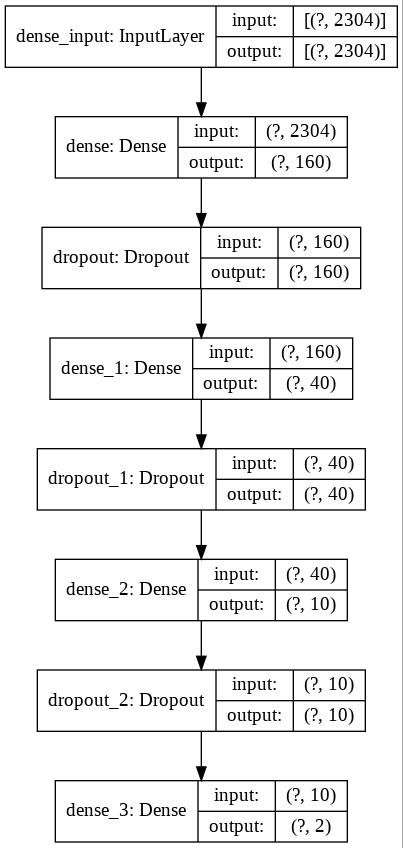

In [ ]:
plot_model(mlp_gender, to_file="mlp_gender.jpg", show_shapes=True, show_layer_names=True)

In [ ]:
#call and fit the model, 64, 25
mlp_g = mlp_gender.fit(X_gender_train, y_gender_train, batch_size=bs, epochs=ep, callbacks=call, validation_data=(X_gender_val,y_gender_val))

Epoch 1/30
108/108 [==============================] - 1s 10ms/step - loss: 0.7121 - accuracy: 0.5214 - val_loss: 0.6723 - val_accuracy: 0.6164
Epoch 2/30
108/108 [==============================] - 1s 9ms/step - loss: 0.6700 - accuracy: 0.5878 - val_loss: 0.6124 - val_accuracy: 0.7036
Epoch 3/30
108/108 [==============================] - 1s 9ms/step - loss: 0.6178 - accuracy: 0.6651 - val_loss: 0.5398 - val_accuracy: 0.7548
Epoch 4/30
108/108 [==============================] - 1s 9ms/step - loss: 0.5646 - accuracy: 0.7180 - val_loss: 0.4812 - val_accuracy: 0.7836
Epoch 5/30
108/108 [==============================] - 1s 9ms/step - loss: 0.5362 - accuracy: 0.7438 - val_loss: 0.4525 - val_accuracy: 0.8014
Epoch 6/30
108/108 [==============================] - 1s 9ms/step - loss: 0.5123 - accuracy: 0.7639 - val_loss: 0.4294 - val_accuracy: 0.8082
Epoch 7/30
108/108 [==============================] - 1s 9ms/step - loss: 0.4964 - accuracy: 0.7698 - val_loss: 0.4164 - val_accuracy: 0.8163
Epoch

In [ ]:
fig = px.line(
    mlp_g.history,
    y=['loss', 'val_loss'],
    labels={'index': "Epoch", 'value': "Loss"},
    title="Gender Model"
)

fig.show()

In [ ]:
#evaluate the model
loss, acc = mlp_gender.evaluate(X_gender_test,y_gender_test)
print("Test Accuracy: %.3f" % acc)

144/144 [==============================] - 0s 2ms/step - loss: 0.3730 - accuracy: 0.8313
Test Accuracy: 0.831


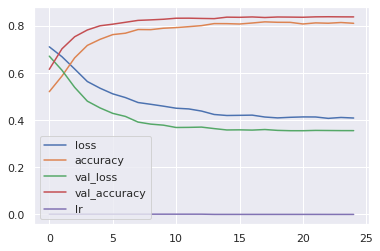

In [ ]:
pd.DataFrame(mlp_g.history).plot();

In [ ]:
X_gender_train[0].shape
x0 = X.reshape(X.shape[0],48,48)
print(x0[0])

[[0.5058824  0.5019608  0.5019608  ... 0.4627451  0.3882353  0.20784314]
 [0.50980395 0.5058824  0.5019608  ... 0.45882353 0.38431373 0.20392157]
 [0.5137255  0.5058824  0.50980395 ... 0.44705883 0.38039216 0.19607843]
 ...
 [0.4745098  0.5411765  0.5764706  ... 0.5921569  0.5882353  0.5803922 ]
 [0.45882353 0.5372549  0.57254905 ... 0.58431375 0.5803922  0.5803922 ]
 [0.4509804  0.5294118  0.5568628  ... 0.57254905 0.57254905 0.57254905]]


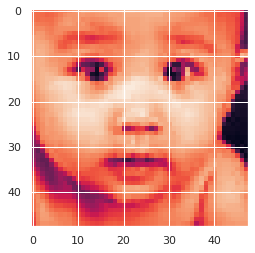

In [ ]:
plt.imshow(x0[0])

### **Gender Prediction**

In [ ]:
#make a prediction, corresponding to each class of gender
ypred = mlp_gender.predict(X_gender_test)
print("Predicted: %s (class=%d)" % (ypred, np.argmax(ypred)))

Predicted: [[0.15835297 0.84164697]
 [0.9167066  0.08329338]
 [0.9431805  0.05681942]
 ...
 [0.6057849  0.3942151 ]
 [0.5044164  0.49558365]
 [0.04148984 0.95851016]] (class=123)


In [ ]:
# Man absolute error
print("MAE: {}".format(mean_absolute_error(y_gender_test, ypred)))

MAE: 0.23876426263802475


In [ ]:
ypred = np.argmax(ypred, axis=1)
y_gen_arg = np.argmax(y_gender_test, axis=1)

print(ypred)
print(classification_report(y_gen_arg, ypred))

[1 0 0 ... 0 0 1]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      2343
           1       0.84      0.81      0.83      2245

    accuracy                           0.83      4588
   macro avg       0.83      0.83      0.83      4588
weighted avg       0.83      0.83      0.83      4588



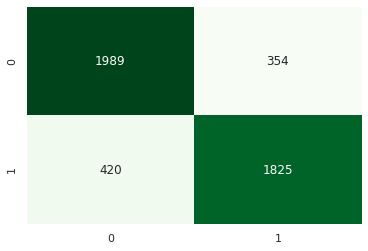

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_gen_arg, ypred)
sns.heatmap(cm, cmap='Greens', cbar=False, annot=True, fmt='d');

**Saving MLP model for gender classification**

In [ ]:
#in hdf5 format
mlp_gender.save("all_saved_models/hdf5_MLP_model/MLP_gender_model")

INFO:tensorflow:Assets written to: all_saved_models/hdf5_MLP_model/MLP_gender_model/assets


#  **2. Ethnicity Model**

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
mlp_ethnicity = build_model(num_e_classes,'softmax')

In [ ]:
mlp_ethnicity.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               368800    
_________________________________________________________________
dropout (Dropout)            (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                6440      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                410       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 5

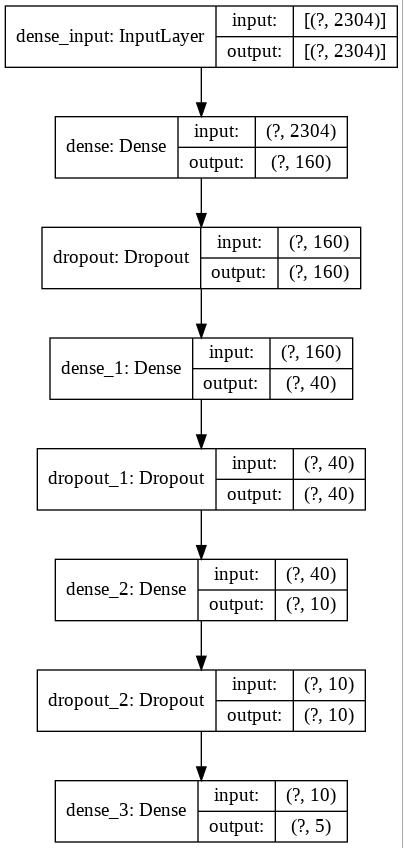

In [ ]:
plot_model(mlp_ethnicity, to_file="mlp_ethnicity.jpg", show_shapes=True, show_layer_names=True)

In [ ]:
#call and fit the model
mlp_eth = mlp_ethnicity.fit(X_ethnicity_train, y_ethnicity_train, batch_size=bs, epochs=ep, callbacks=call, validation_data=(X_ethnicity_val, y_ethnicity_val))

Epoch 1/30
135/135 [==============================] - 1s 10ms/step - loss: 1.5894 - accuracy: 0.2561 - val_loss: 1.5290 - val_accuracy: 0.4289
Epoch 2/30
135/135 [==============================] - 1s 9ms/step - loss: 1.5068 - accuracy: 0.4155 - val_loss: 1.4717 - val_accuracy: 0.4289
Epoch 3/30
135/135 [==============================] - 1s 9ms/step - loss: 1.4736 - accuracy: 0.4266 - val_loss: 1.4494 - val_accuracy: 0.4289
Epoch 4/30
135/135 [==============================] - 1s 9ms/step - loss: 1.4616 - accuracy: 0.4266 - val_loss: 1.4403 - val_accuracy: 0.4289
Epoch 5/30
135/135 [==============================] - 1s 9ms/step - loss: 1.4560 - accuracy: 0.4266 - val_loss: 1.4351 - val_accuracy: 0.4289
Epoch 6/30
135/135 [==============================] - 1s 9ms/step - loss: 1.4493 - accuracy: 0.4266 - val_loss: 1.4294 - val_accuracy: 0.4289
Epoch 7/30
135/135 [==============================] - 1s 9ms/step - loss: 1.4459 - accuracy: 0.4266 - val_loss: 1.4237 - val_accuracy: 0.4289
Epoch

In [ ]:
fig = px.line(
    mlp_eth.history,
    y=['loss', 'val_loss'],
    labels={'index': "Epoch", 'value': "Loss"},
    title="Ethnicity Model"
)

fig.show()

In [ ]:
#evaluate the model
loss, acc = mlp_ethnicity.evaluate(X_ethnicity_test,y_ethnicity_test)
print("Test Accuracy: %.3f" % acc)

144/144 [==============================] - 0s 2ms/step - loss: 1.3072 - accuracy: 0.4235
Test Accuracy: 0.423


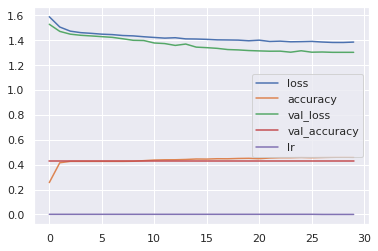

In [ ]:
pd.DataFrame(mlp_eth.history).plot();

###  **Ethnicity Prediction**

In [ ]:
#make a prediction
ye_pred = mlp_ethnicity.predict(X_ethnicity_test)
print("Predicted: %s (class=%d)" % (ye_pred, np.argmax(ye_pred)))
# Man absolute error
print("MAE: {}".format(mean_absolute_error(y_ethnicity_test, ye_pred)))

Predicted: [[0.3382878  0.2597677  0.11582488 0.20889997 0.07721964]
 [0.30315214 0.2927047  0.1032759  0.22363165 0.07723561]
 [0.30023095 0.29548603 0.10223343 0.22483993 0.07720964]
 ...
 [0.40453383 0.20028563 0.1396607  0.17981802 0.07570188]
 [0.45050973 0.16087961 0.15652704 0.1583812  0.07370248]
 [0.30023107 0.29548594 0.10223348 0.2248399  0.07720965]] (class=8210)
MAE: 0.2752075572070238


In [ ]:
y_eth_arg = [np.argmax(i) for i in y_ethnicity_test]
ye_pred_arg = [np.argmax(i) for i in ye_pred]

In [ ]:
set(y_eth_arg) - set(ye_pred_arg)

{1, 2, 3, 4}

In [ ]:
precision_recall_fscore_support(y_eth_arg, ye_pred_arg)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



(array([0.42349608, 0.        , 0.        , 0.        , 0.        ]),
 array([1., 0., 0., 0., 0.]),
 array([0.59500842, 0.        , 0.        , 0.        , 0.        ]),
 array([1943,  870,  651,  811,  313]))

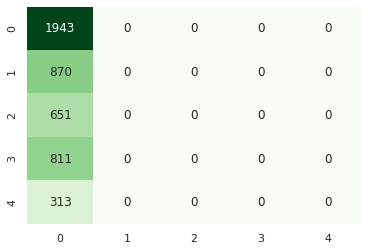

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_eth_arg, ye_pred_arg)
sns.heatmap(cm, cmap='Greens', cbar=False, annot=True, fmt='d');

**Saving MLP model for Ethnicity classification**

In [ ]:
#in hdf5 format
mlp_ethnicity.save("all_saved_models/hdf5_MLP_model/MLP_ethnicity_model")

INFO:tensorflow:Assets written to: all_saved_models/hdf5_MLP_model/MLP_ethnicity_model/assets


# **Reading the saved models**

In [ ]:
#loading hdf5 model
gender_model = load_model("all_saved_models/hdf5_MLP_model/MLP_gender_model")
gender_model.summary()

loss, acc = gender_model.evaluate(X_gender_test, y_gender_test, verbose=0)
print('HDF5 restored model, accuracy: {:5.2f}%'.format(100 * acc))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               368800    
_________________________________________________________________
dropout (Dropout)            (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                6440      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                410       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2

In [ ]:
#loading hdf5 model
eth_model = load_model("all_saved_models/hdf5_MLP_model/MLP_ethnicity_model")
eth_model.summary()

loss, acc = eth_model.evaluate(X_ethnicity_test, y_ethnicity_test, verbose=0)
print('HDF5 restored model, accuracy: {:5.2f}%'.format(100 * acc))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               368800    
_________________________________________________________________
dropout (Dropout)            (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                6440      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                410       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 5